<a href="https://colab.research.google.com/github/MarcelaMonteiroMontenegroGallo/Python/blob/master/Roubos_carros_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.ticker as ticker
from datetime import datetime
import folium
from folium import plugins
from folium.plugins import HeatMap



%matplotlib inline

In [0]:
from google.colab import files
uploaded = files.upload()

Saving 13_Roubo_de_Veiculos_2018.csv to 13_Roubo_de_Veiculos_2018.csv


In [0]:
dados_roubo = pd.read_csv(r'13_Roubo_de_Veiculos_2018.csv', low_memory=False,delimiter=';', encoding='iso-8859-1', decimal=',')
dados_roubo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 54 columns):
ANO_BO                      1011 non-null int64
NUM_BO                      1011 non-null int64
NUMERO_BOLETIM              1011 non-null object
BO_INICIADO                 1011 non-null object
BO_EMITIDO                  1011 non-null object
DATAOCORRENCIA              1011 non-null object
PERIDOOCORRENCIA            1011 non-null object
DATACOMUNICACAO             1011 non-null object
DATAELABORACAO              1011 non-null object
BO_AUTORIA                  1011 non-null object
FLAGRANTE                   1011 non-null object
NUMERO_BOLETIM_PRINCIPAL    109 non-null object
LOGRADOURO                  882 non-null object
NUMERO                      1010 non-null float64
BAIRRO                      876 non-null object
CIDADE                      882 non-null object
UF                          882 non-null object
LATITUDE                    872 non-null float64
LONGITUDE        

In [0]:
dados_roubo.rename(columns={'DATAOCORRENCIA': 'DATA_DE_OCORRENCIA','DESCR_MARCA_VEICULO': 'MARCA_DO_VEICULO',
                            'PERIDOOCORRENCIA':'PERIODO_DE_OCORRENCIA','DATAELABORACAO': 'DATA_DE_ELABORACAO'}, inplace=True)
dados_roubo.sample(10)

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATA_DE_OCORRENCIA,PERIODO_DE_OCORRENCIA,DATACOMUNICACAO,DATA_DE_ELABORACAO,BO_AUTORIA,FLAGRANTE,NUMERO_BOLETIM_PRINCIPAL,LOGRADOURO,NUMERO,BAIRRO,CIDADE,UF,LATITUDE,LONGITUDE,DESCRICAOLOCAL,EXAME,SOLUCAO,DELEGACIA_NOME,DELEGACIA_CIRCUNSCRICAO,ESPECIE,RUBRICA,DESDOBRAMENTO,STATUS,NOMEPESSOA,TIPOPESSOA,VITIMAFATAL,RG,RG_UF,NATURALIDADE,NACIONALIDADE,SEXO,DATANASCIMENTO,IDADE,ESTADOCIVIL,PROFISSAO,GRAUINSTRUCAO,CORCUTIS,NATUREZAVINCULADA,TIPOVINCULO,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,MARCA_DO_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR
465,2018,1932,1932/2018,15/06/2018 19:52,15/06/2018 23:19,15/06/2018,A NOITE,15/06/2018,15/06/2018 19:52,Conhecida,Sim,NaN,RUA ABEL CURSINO DOS SANTOS,1.0,JARDIM SANTA INÊS I,S.JOSE DOS CAMPOS,SP,-23.176451,-45.799457,Via pública,IC-IML,ENCAM FEBEM/V.INFAN.JUVENTUDE,DEL.SEC.POL.SJCAMPOS PL SUL,06º D.P. S.JOSE DOS CAMPOS,Ato infracional,A.I.-Lesão corporal culposa na direção de veíc...,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
616,2018,1678,1678/2018,14/08/2018 17:50,14/08/2018 18:28,13/08/2018,A NOITE,14/08/2018,14/08/2018 17:50,Desconhecida,Não,NaN,RODOVIA PRESIDENTE DUTRA (BR 116),133.0,AREA RURAL,CACAPAVA,SP,-23.133939,-45.749345,Comércio e serviços,NaN,BO PARA REGISTRO,02º D.P. JUNDIAI,DEL.POL.CACAPAVA,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ODR2906,ES,SERRA,Cinza,SR/FACCHINI SRF LO,2013.0,2013.0,SEMI-REBOQUE,NaN,NaN
777,2018,949,949/2018,07/10/2018 10:06,07/10/2018 18:06,07/10/2018,PELA MANHÃ,07/10/2018,07/10/2018 10:06,Conhecida,Sim,NaN,RUA ROMENIA,65.0,VILA NAIR,S.JOSE DOS CAMPOS,SP,-23.216518,-45.882351,Via pública,IC-IML,BO PARA FLAGRANTE,DEL.POL.PARAIBUNA,07º D.P. S.JOSE DOS CAMPOS,L 9503/97 - Código de Trânsito Brasileiro,Lesão corporal culposa na direção de veículo a...,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
515,2018,2145,2145/2018,30/06/2018 21:43,30/06/2018 22:08,30/06/2018,A NOITE,30/06/2018,30/06/2018 21:43,Desconhecida,Não,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Residência,NaN,APRECIAÇÃO DO DELEGADO TITULAR,DEL.SEC.POL.SJCAMPOS PL SUL,06º D.P. S.JOSE DOS CAMPOS,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DWB3479,SP,SÃO JOSÉ DOS CAMPOS,Preta,FIAT/PALIO ELX FLEX,2007.0,2008.0,AUTOMOVEL,NaN,NaN
38,2018,234,234/2018,18/01/2018 03:27,18/01/2018 04:51,17/01/2018,A NOITE,18/01/2018,18/01/2018 03:27,Desconhecida,Não,NaN,AVENIDA HENRY NESTLÉ,1800.0,AREA RURAL,CACAPAVA,SP,-23.120407,-45.723760,Via pública,NaN,APRECIAÇÃO DO DELEGADO TITULAR,10º D.P. OSASCO,DEL.POL.CACAPAVA,Localização e/ou Devolução,Localização/Apreensão e Entrega de veículo,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
991,2018,4205,4205/2018,24/12/2018 13:14,24/12/2018 13:38,24/12/2018,PELA MANHÃ,24/12/2018,24/12/2018 13:14,Desconhecida,Não,NaN,ESTRADA ANTONIO FREDERICO OZANAM,1.0,SANTA HERMÍNIA,S.JOSE DOS CAMPOS,SP,-23.202012,-45.775550,Via pública,NaN,APRECIAÇÃO DO DELEGADO TITULAR,DEL.SEC.POL.SJCAMPOS PL SUL,06º D.P. S.JOSE DOS CAMPOS,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DPU7281,SP,SÃO JOSÉ DOS CAMPOS,Preta,HONDA/CG 125 FAN,2006.0,2006.0,MOTOCICLO,NaN,NaN
881,2018,2696,2696/2018,12/11/2018 09:17,12/11/2018 09:33,09/11/2018,DE MADRUGADA,12/11/2018,12/11/2018 09:17,Desconhecida,Não,NaN,AVENIDA VINTE E TRES DE DEZEMBRO,152.0,JARDIM DAS CEREJEIRAS,S.JOSE DOS CAMPOS,SP,-23.195406,-45.791036,Via pública,NaN,APRECIAÇÃO DO DELEGADO TITULAR,06º D.P. S.JOSE DOS CAMPOS,06º D.P. S.JOSE DOS CAMPO

In [0]:
mapa = folium.Map([-23.208, -45.849], zoom_start=11)
dados_roubo=dados_roubo.dropna(subset=['LATITUDE'])
dados_roubo=dados_roubo.dropna(subset=['LONGITUDE'])
local = dados_roubo[['LATITUDE', 'LONGITUDE']].values
HeatMap(local).add_to(mapa)
mapa

In [0]:
dados_roubo['BAIRRO'].value_counts().head(10)

CENTRO                   51
AREA RURAL               31
EUGÊNIO DE MELO          28
PARQUE INDUSTRIAL        22
BOSQUE DOS EUCALIPTOS    21
CHÁCARAS REUNIDAS        20
JARDIM MORUMBI           16
JARDIM SATÉLITE          15
PARQUE INTERLAGOS        14
RES ESPERANÇA            13
Name: BAIRRO, dtype: int64

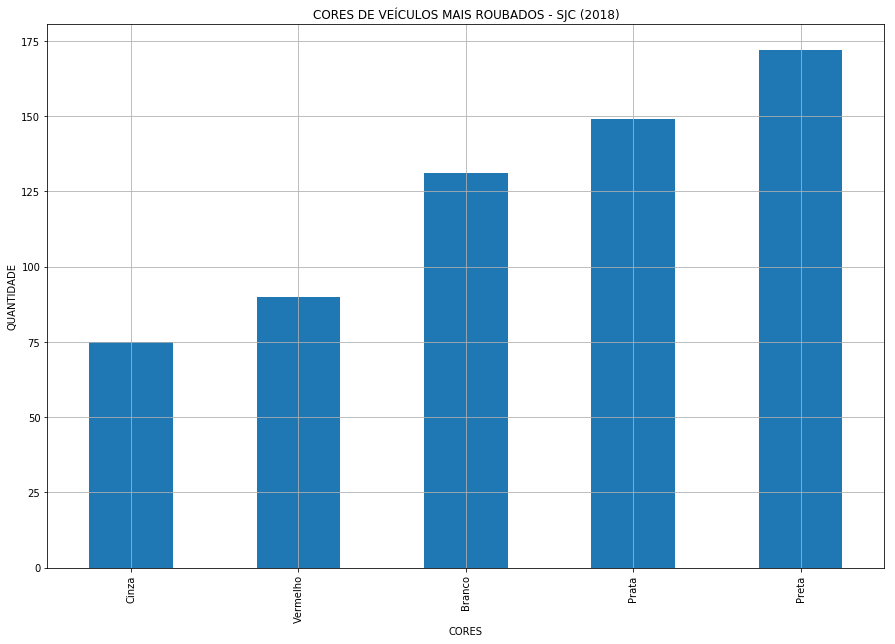

In [0]:
dados_roubo.groupby('DESCR_COR_VEICULO').size().sort_values().tail(5).plot(kind='bar', figsize=(15,10), fontsize = 'medium')
plt.title('CORES DE VEÍCULOS MAIS ROUBADOS - SJC (2018)')
plt.ylabel('QUANTIDADE')
plt.xlabel('CORES')
plt.grid(True, which='major')